In [1]:
import torch
from torch.autograd import Variable

In [6]:
class RNN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        """
        Initiate nn.Linear modules
        """
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        self.input_hidden = torch.nn.Linear(input_size + hidden_size, hidden_size)
        self.input_output = torch.nn.Linear(input_size + hidden_size, output_size)
        
        self.softmax = torch.nn.LogSoftmax()
        
    def forward(self, x, hidden):
        """
        Get your Varible and return prediction
        """
        inandhidden = torch.cat((x, hidden), 1)
        hidden = self.input_hidden(inandhidden)
        output = self.input_output(inandhidden)
        prediction = self.softmax(output)
        
        return prediction, hidden
    
    def init_hidden(self):
        return Variable(torch.zeros(1, self.hidden_size))

In [11]:
n_letters = 57
n_hidden = 128
n_categories = 18
batch_size, input_size, hidden_size, output_size = 1, n_letters, n_hidden, n_categories
learning_rate = 5e-3  # 1e-6 is too small here with nn

In [12]:
x = Variable(torch.randn(batch_size, input_size), requires_grad = False) # False is default
y = Variable(torch.randn(batch_size, output_size), requires_grad = False)

In [21]:
# model = torch.nn.Sequential(
#         torch.nn.Linear(input_size, hidden_size),
#         torch.nn.ReLU(),
#         torch.nn.Linear(hidden_size, output_size))
model  = RNN(input_size, hidden_size, output_size)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [22]:
all_losses = []

for i in range(500):
    # initialize hidden
    hidden = model.init_hidden()
    
    # forward
    prediction, hidden = model(x, hidden)

    # loss
    loss = loss_fn(prediction, y)
    all_losses.append(loss)
#     print('i = %d, loss = %d' %(i, loss.data))
    
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/home/hansol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


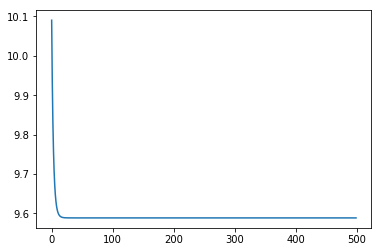

In [17]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.figure()
plt.plot(all_losses)

In [18]:
all_losses

[tensor(10.0903, grad_fn=<MseLossBackward>),
 tensor(9.9359, grad_fn=<MseLossBackward>),
 tensor(9.8305, grad_fn=<MseLossBackward>),
 tensor(9.7579, grad_fn=<MseLossBackward>),
 tensor(9.7074, grad_fn=<MseLossBackward>),
 tensor(9.6722, grad_fn=<MseLossBackward>),
 tensor(9.6476, grad_fn=<MseLossBackward>),
 tensor(9.6303, grad_fn=<MseLossBackward>),
 tensor(9.6181, grad_fn=<MseLossBackward>),
 tensor(9.6096, grad_fn=<MseLossBackward>),
 tensor(9.6035, grad_fn=<MseLossBackward>),
 tensor(9.5992, grad_fn=<MseLossBackward>),
 tensor(9.5961, grad_fn=<MseLossBackward>),
 tensor(9.5939, grad_fn=<MseLossBackward>),
 tensor(9.5924, grad_fn=<MseLossBackward>),
 tensor(9.5912, grad_fn=<MseLossBackward>),
 tensor(9.5904, grad_fn=<MseLossBackward>),
 tensor(9.5899, grad_fn=<MseLossBackward>),
 tensor(9.5894, grad_fn=<MseLossBackward>),
 tensor(9.5891, grad_fn=<MseLossBackward>),
 tensor(9.5889, grad_fn=<MseLossBackward>),
 tensor(9.5887, grad_fn=<MseLossBackward>),
 tensor(9.5886, grad_fn=<MseLos

something is going!